In [2]:
import pandas as pd #This is just for preprocessing
import random

In [6]:
#df=pd.read_csv('alphabets_28x28.csv')
#print(list(df.index))
'''for el in df.index:
    for num in range(1,785):
        df.loc[num].iloc[num]=float(df.loc[num].iloc[num])'''
df=df[df['row 28 col 28 pixel'].notna()]
df

,label,row 1 col 1 pixel,row 1 col 2 pixel,row 1 col 3 pixel,row 1 col 4 pixel,row 1 col 5 pixel,row 1 col 6 pixel,row 1 col 7 pixel,row 1 col 8 pixel,row 1 col 9 pixel,...,row 28 col 19 pixel,row 28 col 20 pixel,row 28 col 21 pixel,row 28 col 22 pixel,row 28 col 23 pixel,row 28 col 24 pixel,row 28 col 25 pixel,row 28 col 26 pixel,row 28 col 27 pixel,row 28 col 28 pixel
0,A,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372446,Z,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,Z,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,Z,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372449,Z,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [10]:
#data = np.array()
targets = []
targets.extend(df['label'])
TARGETS=[]
for el in targets:
    TARGETS.append(ord(el)-65)
len(targets)
Targets=np.array(targets)
TARGETS=np.array(TARGETS)
print(len(Targets))
print(Targets)
print(TARGETS)

371391
['A' 'A' 'A' ... 'Z' 'Z' 'Z']
[ 0  0  0 ... 25 25 25]


In [12]:
#Getting character counts in order to split data into train, validation and test
chr_count=dict()
for num in range(65,91):
    chr_count[chr(num)]=targets.count(chr(num))
chr_count

{'A': 13842,
 'B': 8650,
 'C': 23340,
 'D': 10101,
 'E': 11405,
 'F': 1161,
 'G': 5746,
 'H': 7180,
 'I': 1118,
 'J': 8473,
 'K': 5586,
 'L': 11547,
 'M': 12303,
 'N': 18971,
 'O': 57673,
 'P': 19291,
 'Q': 5795,
 'R': 11532,
 'S': 48279,
 'T': 22428,
 'U': 28927,
 'V': 4168,
 'W': 10750,
 'X': 6256,
 'Y': 10817,
 'Z': 6052}

In [14]:
df=df.iloc[:,1:]
np_df=df.to_numpy(dtype=float)
np_df
#There is probably a more efficient way to do this but i can't spend the time to figure it out

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
train_data={}
valid_data={}
test_data={}
train_values={}
valid_values={}
test_values={}
nums={} #Used to split data into training data, validation data and test data
for num in range(65,91):
    chr_num=chr_count[chr(num)]
    #print(chr_num)
    #print((chr_num*0.8)//1)
    nums[chr(num)]=[int((chr_num*0.8)//1)]
    chr_num-=(chr_num*0.8)//1
    #print((chr_num*0.5)//1)
    nums[chr(num)].append(int((chr_num*0.5)//1))
    chr_num-=(chr_num*0.5)//1
    #print(chr_num)
    nums[chr(num)].append(int(chr_num))
#print(nums)
Sum=0
for num in range(65,91):
    print(Targets[Sum:Sum+chr_count[chr(num)]])
    Sum+=chr_count[chr(num)]
    if chr_count[chr(num)]!=(nums[chr(num)][0]+nums[chr(num)][1]+nums[chr(num)][2]):
        print("Dumbie")


['A' 'A' 'A' ... 'A' 'A' 'A']
['B' 'B' 'B' ... 'B' 'B' 'B']
['C' 'C' 'C' ... 'C' 'C' 'C']
['D' 'D' 'D' ... 'D' 'D' 'D']
['E' 'E' 'E' ... 'E' 'E' 'E']
['F' 'F' 'F' ... 'F' 'F' 'F']
['G' 'G' 'G' ... 'G' 'G' 'G']
['H' 'H' 'H' ... 'H' 'H' 'H']
['I' 'I' 'I' ... 'I' 'I' 'I']
['J' 'J' 'J' ... 'J' 'J' 'J']
['K' 'K' 'K' ... 'K' 'K' 'K']
['L' 'L' 'L' ... 'L' 'L' 'L']
['M' 'M' 'M' ... 'M' 'M' 'M']
['N' 'N' 'N' ... 'N' 'N' 'N']
['O' 'O' 'O' ... 'O' 'O' 'O']
['P' 'P' 'P' ... 'P' 'P' 'P']
['Q' 'Q' 'Q' ... 'Q' 'Q' 'Q']
['R' 'R' 'R' ... 'R' 'R' 'R']
['S' 'S' 'S' ... 'S' 'S' 'S']
['T' 'T' 'T' ... 'T' 'T' 'T']
['U' 'U' 'U' ... 'U' 'U' 'U']
['V' 'V' 'V' ... 'V' 'V' 'V']
['W' 'W' 'W' ... 'W' 'W' 'W']
['X' 'X' 'X' ... 'X' 'X' 'X']
['Y' 'Y' 'Y' ... 'Y' 'Y' 'Y']
['Z' 'Z' 'Z' ... 'Z' 'Z' 'Z']


In [18]:
Sum=0
checksum=0
train_VALUES={}
valid_VALUES={}
test_VALUES={}
for num in range(65,91):
    checksum+=chr_count[chr(num)]
    train_data[chr(num)]=np_df[Sum:Sum+nums[chr(num)][0]]
    train_values[chr(num)]=Targets[Sum:Sum+nums[chr(num)][0]]
    train_VALUES[chr(num)]=TARGETS[Sum:Sum+nums[chr(num)][0]]
    Sum+=nums[chr(num)][0]
    valid_data[chr(num)]=np_df[Sum:Sum+nums[chr(num)][1]]
    valid_values[chr(num)]=Targets[Sum:Sum+nums[chr(num)][1]]
    valid_VALUES[chr(num)]=TARGETS[Sum:Sum+nums[chr(num)][1]]
    Sum+=nums[chr(num)][1]
    test_data[chr(num)]=np_df[Sum:Sum+nums[chr(num)][2]]
    test_values[chr(num)]=Targets[Sum:Sum+nums[chr(num)][2]]
    test_VALUES[chr(num)]=TARGETS[Sum:Sum+nums[chr(num)][2]]
    Sum+=nums[chr(num)][2]
    #print(Sum)
    #print(checksum,end='\n\n')
#print(np_df[Sum])
print(train_data)
print(train_values)
print(train_VALUES)

{'A': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'B': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'C': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'D': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'E': array(

In [20]:
train__data=[]
train__values=[]
valid__data=[]
valid__values=[]
test__data=[]
test__values=[]
for num in range(65,91):
    train__data.extend(train_data[chr(num)])
    valid__data.extend(valid_data[chr(num)])
    test__data.extend(test_data[chr(num)])
    train__values.extend(train_values[chr(num)])
    valid__values.extend(valid_values[chr(num)])
    test__values.extend(test_values[chr(num)])


In [66]:
act_train_data=[]
act_valid_data=[]
act_test_data=[]
act_train_values=[]
act_valid_values=[]
act_test_values=[]
NUMS=[[],[],[]]
for num in range(len(train__data)):
    NUMS[0].append(num)
for num in range(len(valid__data)):
    NUMS[1].append(num)
for num in range(len(test__data)):
    NUMS[2].append(num)
random.shuffle(NUMS[0])
random.shuffle(NUMS[1])
random.shuffle(NUMS[2])

In [582]:
#np.reshape(train__data[0],(28,28))


In [70]:
for num in range(3):
    for NUM in NUMS[num]:
        if num==0:
            act_train_data.append(np.reshape(train__data[NUM],(28,28)))
            act_train_values.append(ord(train__values[NUM])-65)
        elif num==1:
            act_valid_data.append(np.reshape(valid__data[NUM],(28,28)))
            act_valid_values.append(ord(valid__values[NUM])-65)
        else:
            act_test_data.append(np.reshape(test__data[NUM],(28,28)))
            act_test_values.append(ord(test__values[NUM])-65)
    

In [72]:
act_train_data=tf.keras.utils.normalize(act_train_data,axis=1)
act_valid_data=tf.keras.utils.normalize(act_valid_data,axis=1)
act_test_data=tf.keras.utils.normalize(act_test_data,axis=1)
act_train_values=np.array(act_train_values)
act_valid_values=np.array(act_valid_values)
act_test_values=np.array(act_test_values)

In [115]:
'''for num in range(65,91):
    train_data[chr(num)]=tf.keras.utils.normalize(train_data[chr(num)],axis=1)
    valid_data[chr(num)]=tf.keras.utils.normalize(valid_data[chr(num)],axis=1)
    test_data[chr(num)]=tf.keras.utils.normalize(test_data[chr(num)],axis=1)
print(train_data)'''

'for num in range(65,91):\n    train_data[chr(num)]=tf.keras.utils.normalize(train_data[chr(num)],axis=1)\n    valid_data[chr(num)]=tf.keras.utils.normalize(valid_data[chr(num)],axis=1)\n    test_data[chr(num)]=tf.keras.utils.normalize(test_data[chr(num)],axis=1)\nprint(train_data)'

In [858]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) #flattens an input shape, 28x28 -> 784
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15, name='layers_dropout'))
model.add(tf.keras.layers.Dense(26, activation='softmax')) #confidence and 10 as it gives a value of digit

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

C:\Users\siddh\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [862]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) #flattens an input shape, 28x28 -> 784
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.1, name='layers__dropout'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15, name='layers_dropout'))
model.add(tf.keras.layers.Dense(26, activation='softmax')) #confidence and 10 as it gives a value of digit

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

C:\Users\siddh\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [864]:
model.fit(act_train_data,act_train_values,epochs=3)
model.save('riyalll.handwritten.model.keras')

Epoch 1/3
9285/9285 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.8414 - loss: 0.5603
Epoch 2/3
9285/9285 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9494 - loss: 0.1750
Epoch 3/3
9285/9285 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9593 - loss: 0.1388


In [810]:
'''for num in range(65,91):
    #model.fit(train_data[chr(num)],train_values[chr(num)],epochs=3)
    model.fit(train_data[chr(num)],train_VALUES[chr(num)],epochs=3)'''
model.fit(act_train_data,act_train_values,epochs=3)
model.save('riyal.handwritten.model.keras')

Epoch 1/3
9285/9285 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.8547 - loss: 0.5209
Epoch 2/3
9285/9285 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.9609 - loss: 0.1341
Epoch 3/3
9285/9285 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9701 - loss: 0.1026


In [756]:
'''for num in range(65,91):
    #model.fit(train_data[chr(num)],train_values[chr(num)],epochs=3)
    model.fit(train_data[chr(num)],train_VALUES[chr(num)],epochs=3)'''
model.fit(act_train_data,act_train_values,epochs=3)
model.save('riyal.handwritten.model.keras')

Epoch 1/3
9285/9285 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8475 - loss: 0.5367
Epoch 2/3
9285/9285 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9523 - loss: 0.1639
Epoch 3/3
9285/9285 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9614 - loss: 0.1288


In [848]:
model = tf.keras.models.load_model('riyal.handwritten.model.keras')
loss,accuracy=model.evaluate(act_valid_data,act_valid_values)
print("loss =",loss)
print("accuracy =",accuracy)

1161/1161 ━━━━━━━━━━━━━━━━━━━━ 1s 894us/step - accuracy: 0.9711 - loss: 0.0990
loss = 0.10176295787096024
accuracy = 0.9703815579414368


In [866]:
model = tf.keras.models.load_model('riyalll.handwritten.model.keras')
loss,accuracy=model.evaluate(act_valid_data,act_valid_values)
print("loss =",loss)
print("accuracy =",accuracy)

1161/1161 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9726 - loss: 0.0987
loss = 0.10228844732046127
accuracy = 0.9716201424598694


In [850]:
model = tf.keras.models.load_model('riyal.handwritten.model.keras')
loss,accuracy=model.evaluate(act_test_data,act_test_values)
print("loss =",loss)
print("accuracy =",accuracy)

1161/1161 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9699 - loss: 0.1034
loss = 0.10353191196918488
accuracy = 0.9692875146865845


In [868]:
model = tf.keras.models.load_model('riyalll.handwritten.model.keras')
loss,accuracy=model.evaluate(act_test_data,act_test_values)
print("loss =",loss)
print("accuracy =",accuracy)

1161/1161 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9716 - loss: 0.0976
loss = 0.10003437101840973
accuracy = 0.9711447954177856


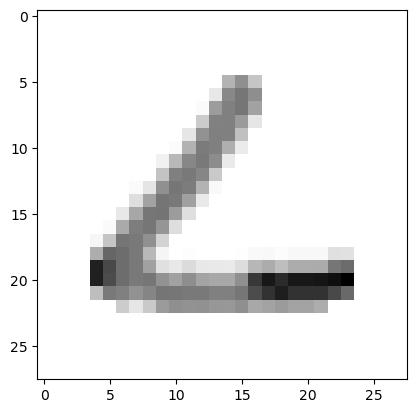

L


In [854]:

plt.imshow(act_valid_data[0],cmap=plt.cm.binary)
plt.show()
print(chr(act_valid_values[0]+65))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
0
A


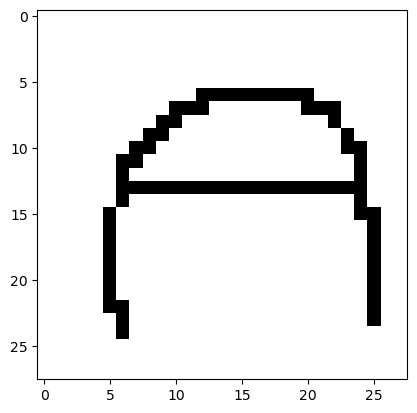

In [852]:
import cv2
import matplotlib.pyplot as plt
model = tf.keras.models.load_model('riyal.handwritten.model.keras')
img=cv2.imread("Asample.png",cv2.IMREAD_GRAYSCALE)
img = np.invert(np.array([img]))
img=img/255
prediction = model.predict(img)
print(np.argmax(prediction))
print(chr(np.argmax(prediction)+65))
plt.imshow(img[0],cmap=plt.cm.binary)
plt.show()

In [1049]:
#Making a model that can convert an image to text
img=cv2.imread("target_images/line_6.png",cv2.IMREAD_GRAYSCALE)
img = np.invert(np.array([img]))
#print(len(img[0]))
x_val=0
y_val=0
line=[]
for k in range(len(img[0])//28):
    x_val=0
    line.append([])
    for j in range(10):
        line[k].append([])
        for i in range(28):
            line[k][j].append([])
            line[k][j][i].extend(img[0][i+y_val][x_val:x_val+28])
        x_val+=28
    y_val+=28
line=np.array(line)
#line=tf.keras.utils.normalize(line,axis=1)
#print(line)
'''plt.imshow(line,cmap=plt.cm.binary)
plt.show()'''

'plt.imshow(line,cmap=plt.cm.binary)\nplt.show()'

In [696]:
'''for row in line:
    for space in row:
        print(space)'''
#Let's make a whitespace character to help avoid confusion (tedious but still)
ws=[]
for a in range(28):
    ws.append([])
    for b in range(28):
        ws[a].append(0)
ws=np.array(ws)
#print(ws)
(space==ws).all()

False

In [1051]:
OP=''
letsss=[]
model = tf.keras.models.load_model('riyal.handwritten.model.keras')
for row in line:
    for space in row:
        space=np.invert(space)
        if ((space==ws).all()) == True:
            OP+=' '
        else:
            #plt.imshow(space,cmap=plt.cm.binary)
            #plt.show()
            letsss.append(space)
            space=[space]
            prediction = model.predict(np.array(space))
            OP+=chr(np.argmax(prediction)+65)
print(OP)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

In [1052]:
OP=''  #This model is giving closer resembling results, hence this is prefered
letsss=[]
model = tf.keras.models.load_model('riyalll.handwritten.model.keras')
for row in line:
    for space in row:
        space=np.invert(space)
        if ((space==ws).all()) == True:
            OP+=' '
        else:
            #plt.imshow(space,cmap=plt.cm.binary)
            #plt.show()
            letsss.append(space)
            space=[space]
            prediction = model.predict(np.array(space))
            OP+=chr(np.argmax(prediction)+65)
print(OP)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
0
A


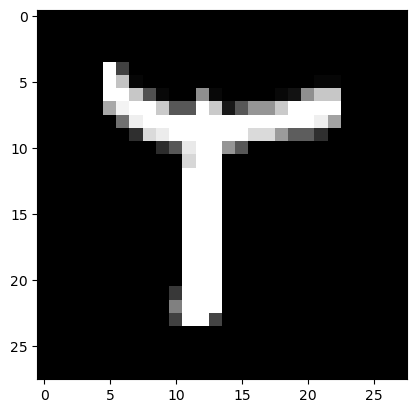

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
0
A


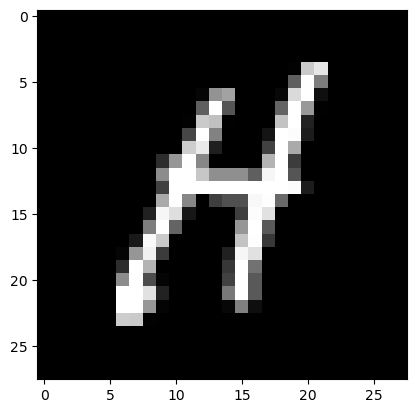

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
0
A


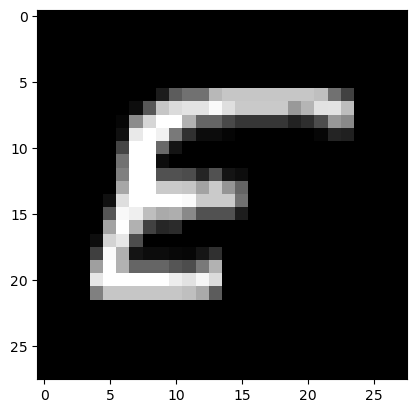

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
0
A


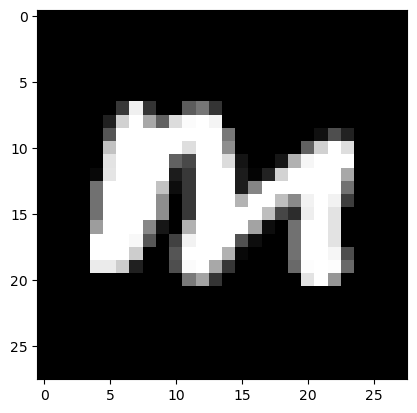

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
0
A


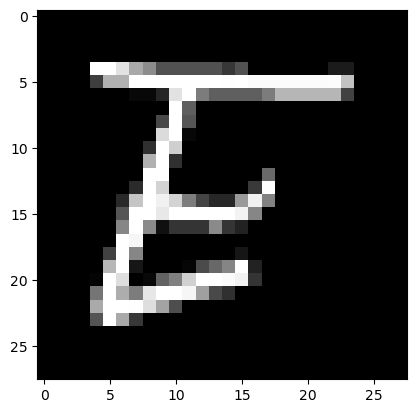

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
0
A


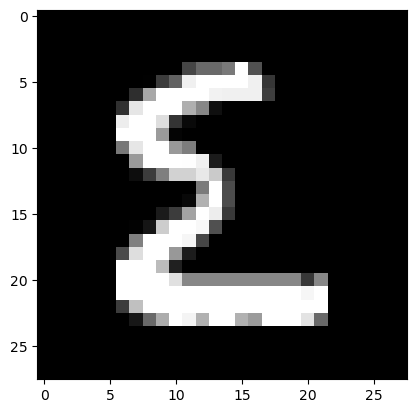

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
0
A


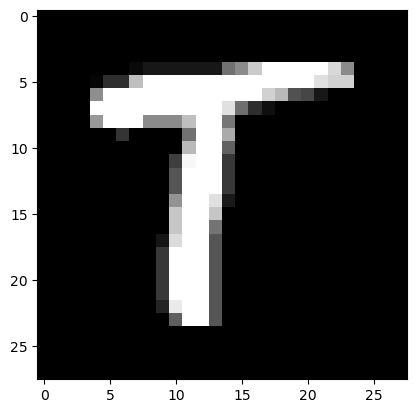

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0
A


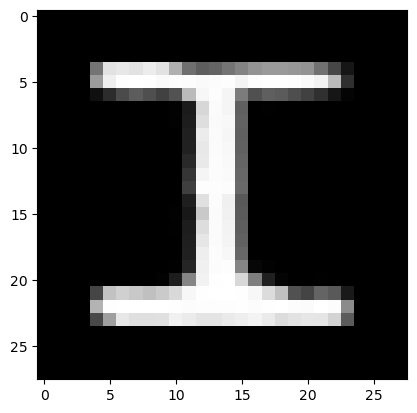

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
0
A


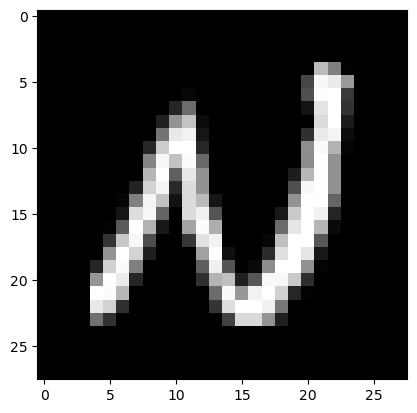

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
0
A


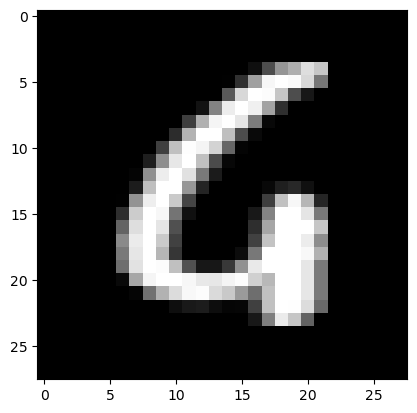

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
0
A


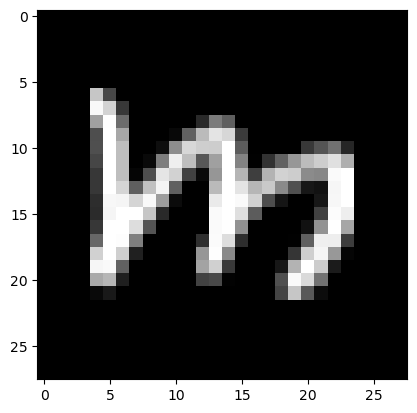

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
0
A


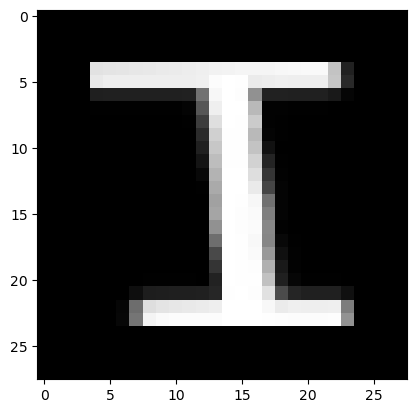

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
0
A


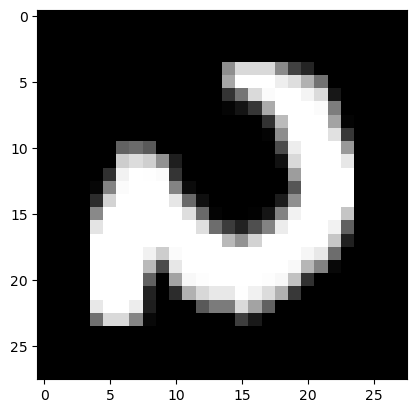

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
0
A


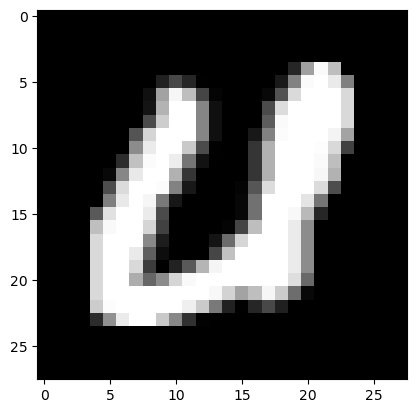

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0
A


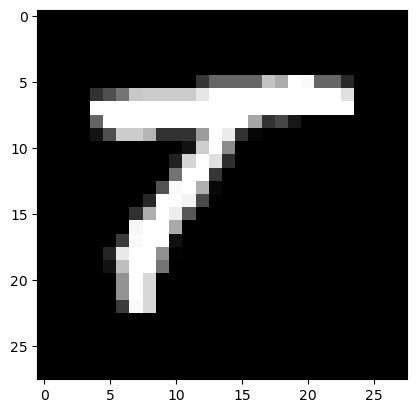

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0
A


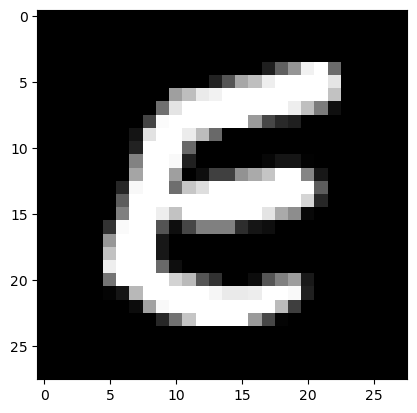

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0
A


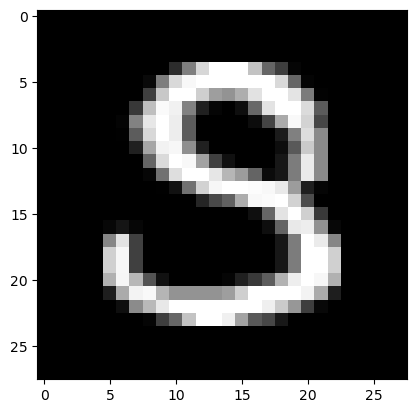

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
0
A


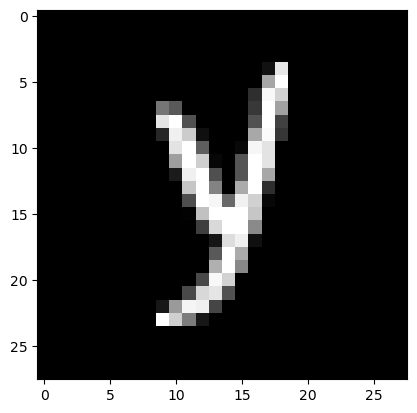

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
0
A


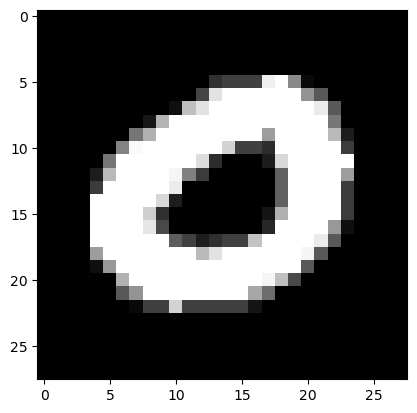

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
0
A


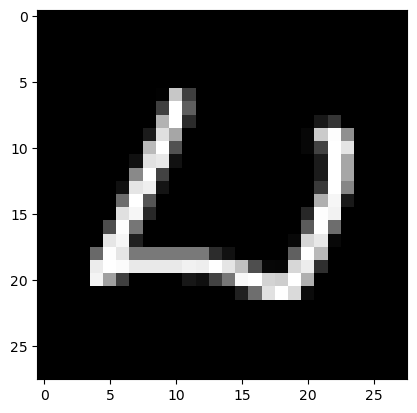

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
0
A


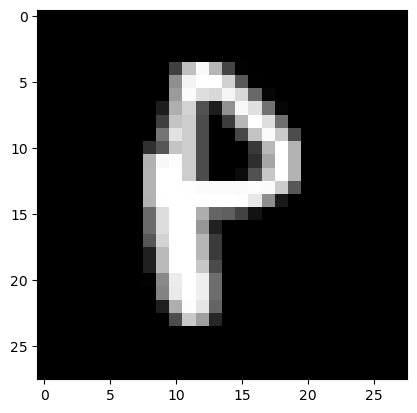

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0
A


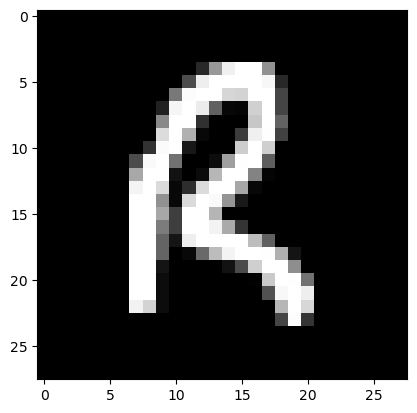

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0
A


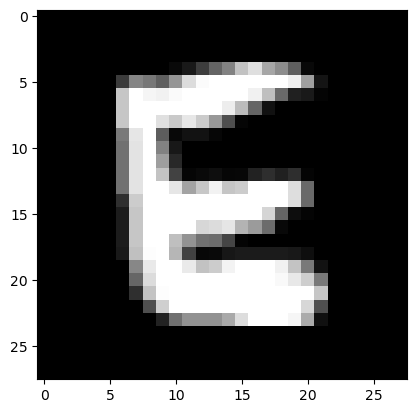

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
0
A


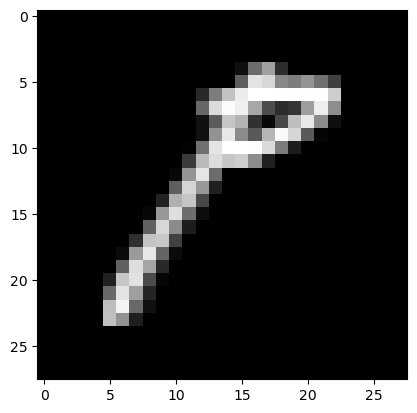

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
0
A


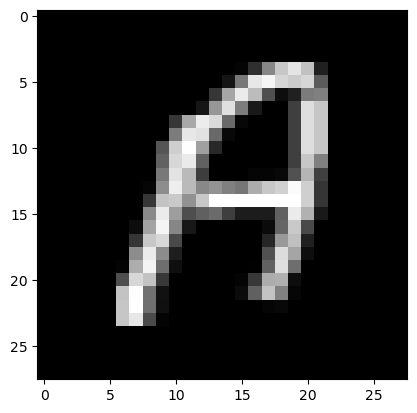

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
0
A


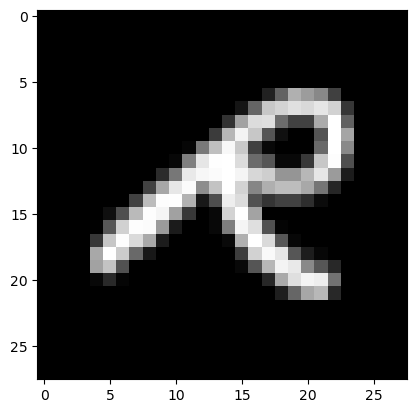

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
0
A


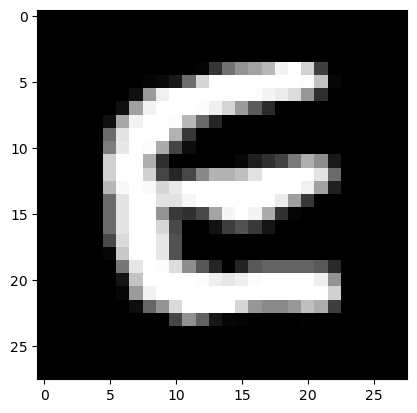

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
0
A


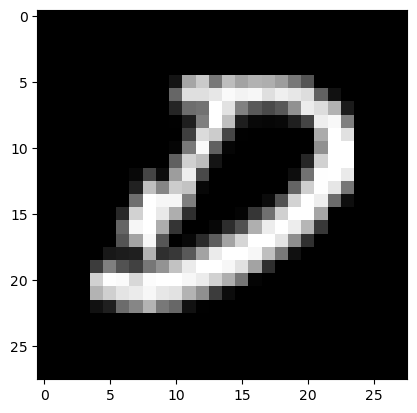

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0
A


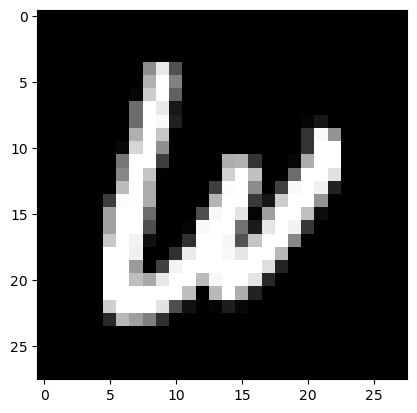

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
0
A


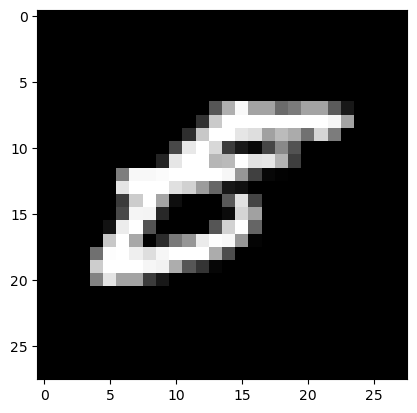

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
0
A


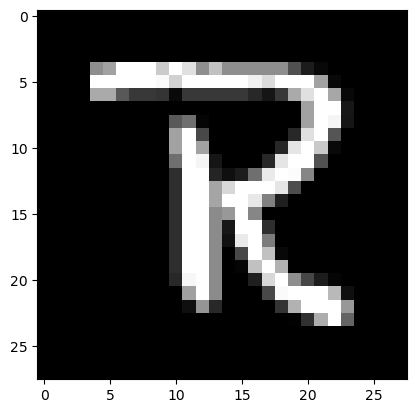

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0
A


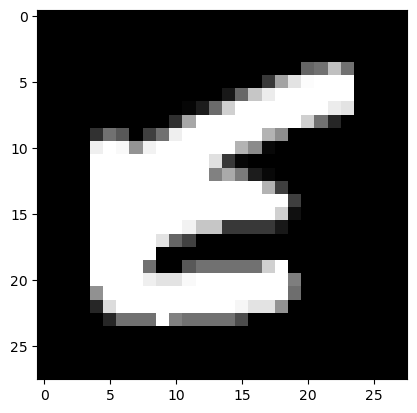

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
0
A


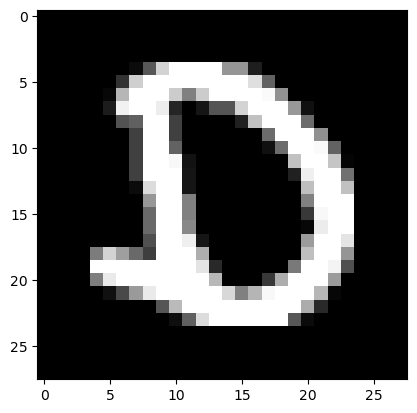

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
0
A


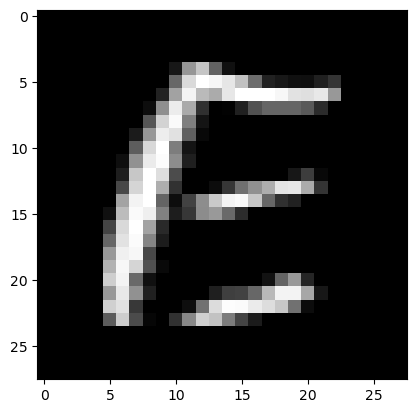

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
0
A


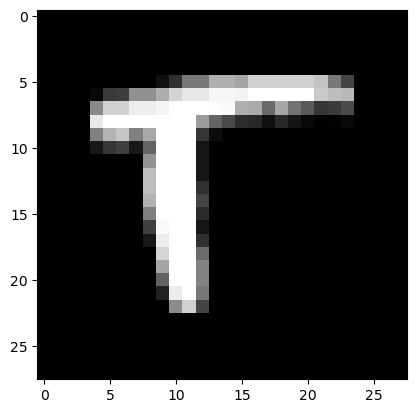

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0
A


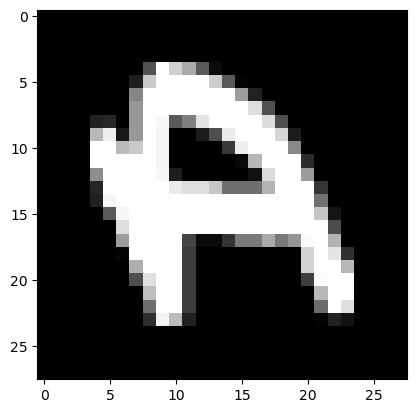

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0
A


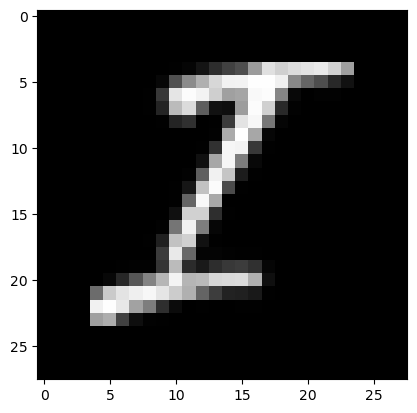

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
0
A


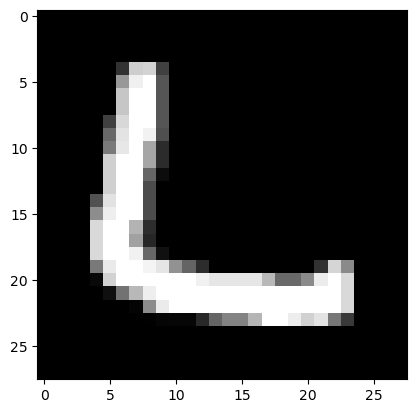

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
0
A


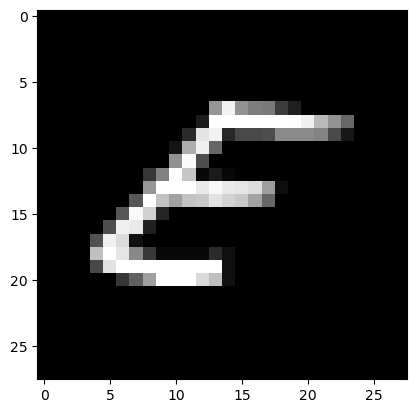

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
0
A


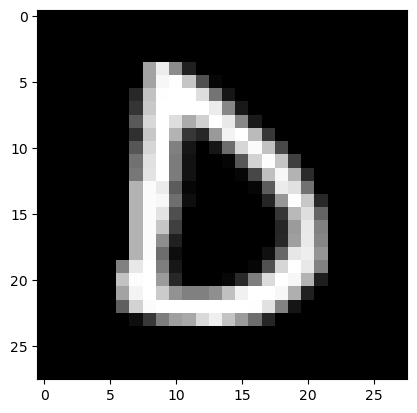

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0
A


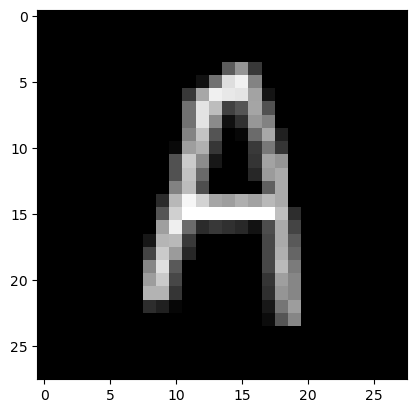

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
0
A


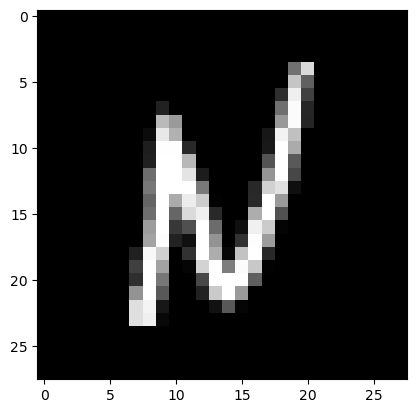

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
0
A


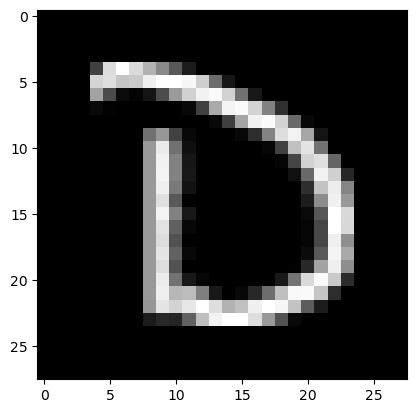

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
0
A


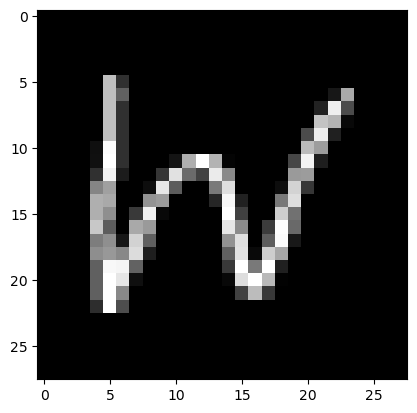

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
0
A


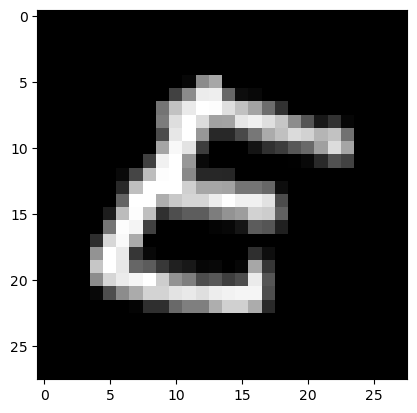

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
0
A


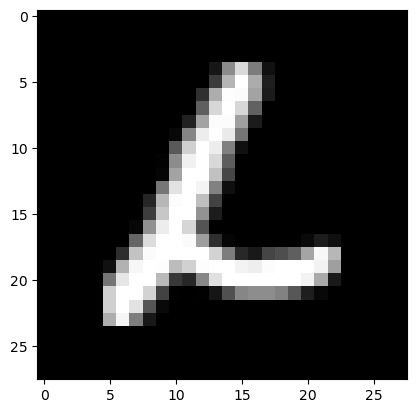

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
0
A


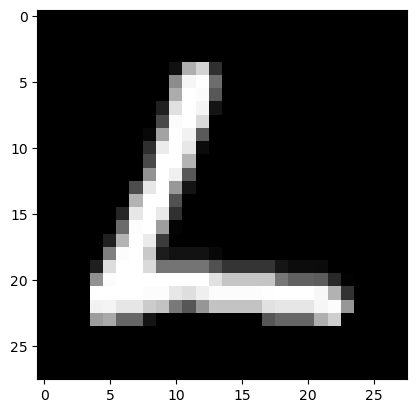

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
0
A


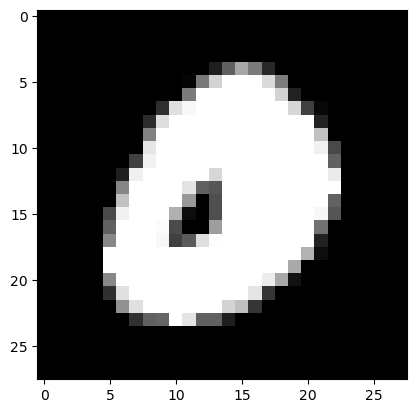

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0
A


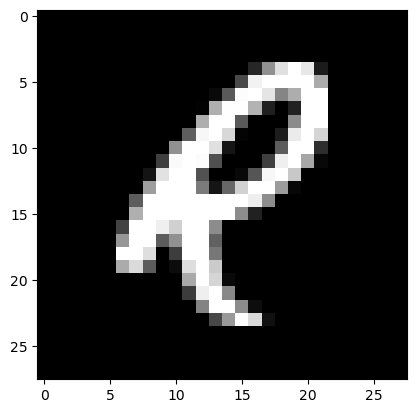

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0
A


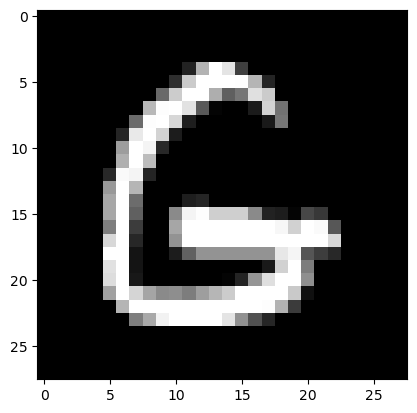

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
0
A


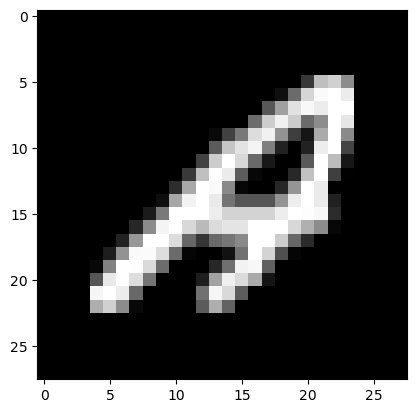

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
0
A


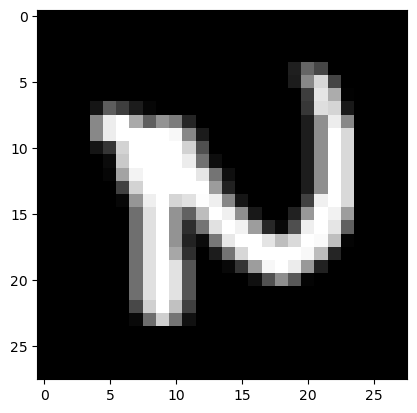

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
0
A


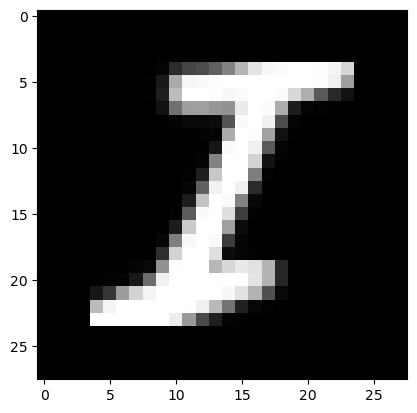

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
0
A


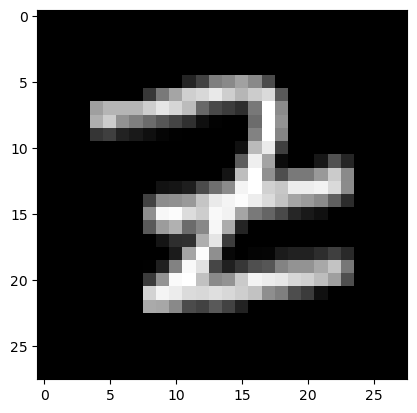

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
0
A


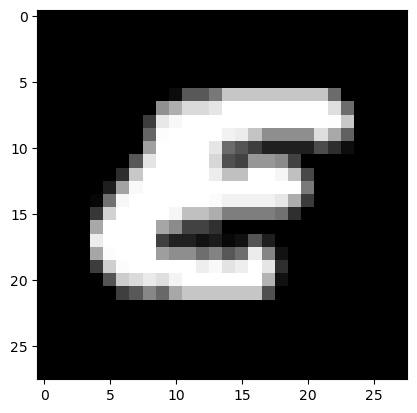

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
0
A


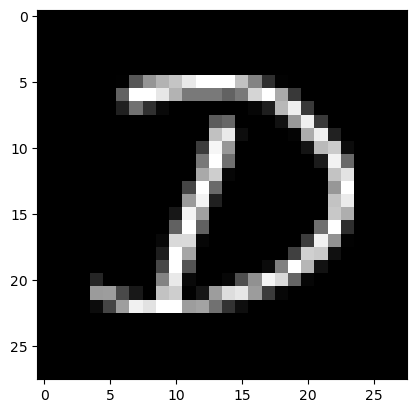

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
0
A


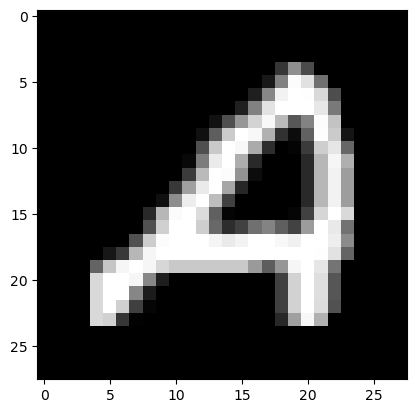

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
0
A


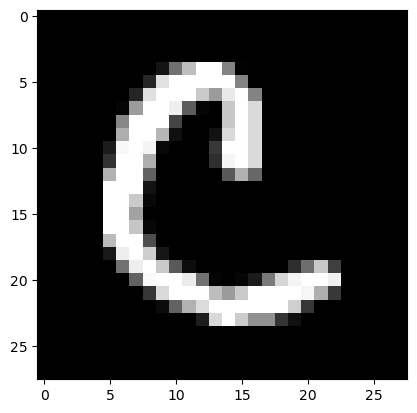

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
0
A


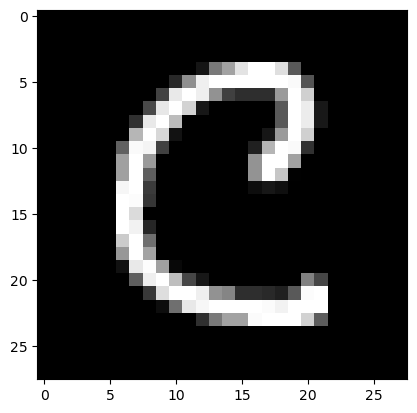

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
0
A


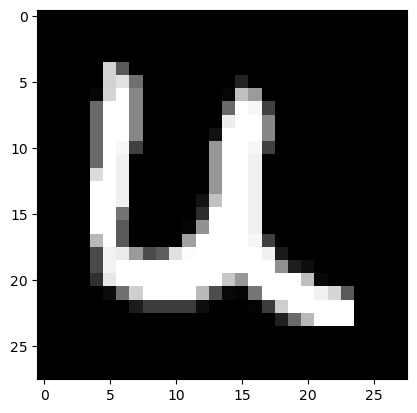

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
0
A


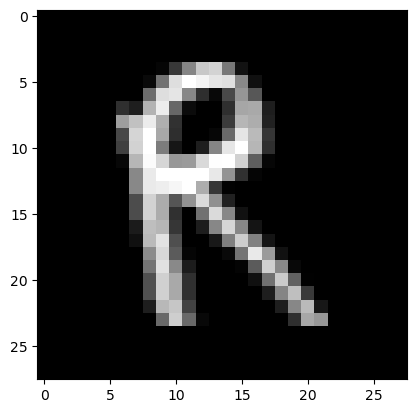

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
0
A


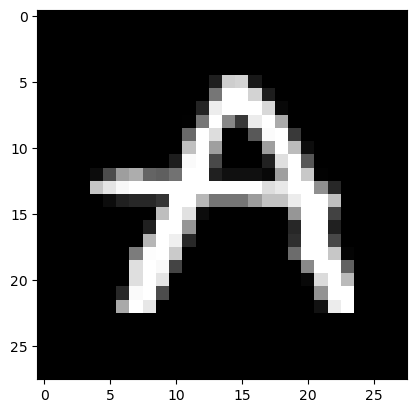

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
0
A


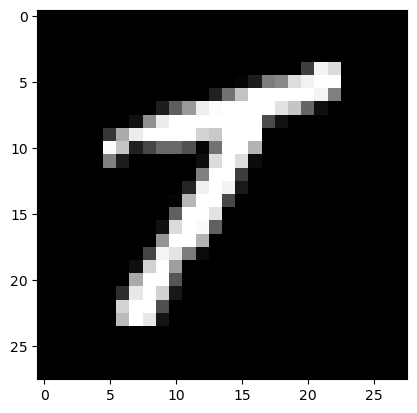

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
0
A


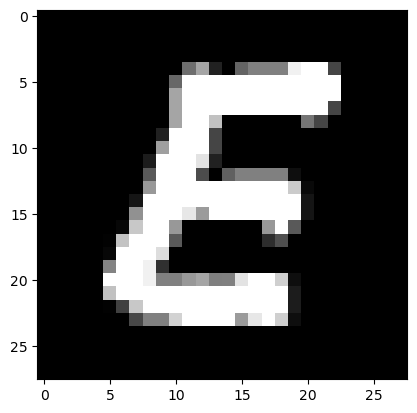

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
0
A


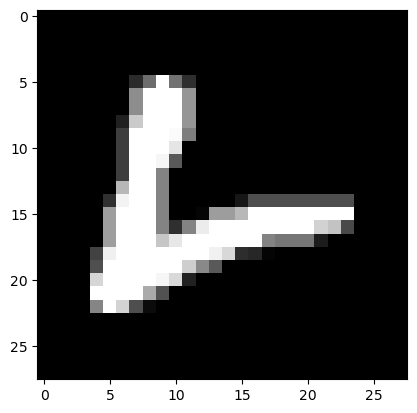

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
0
A


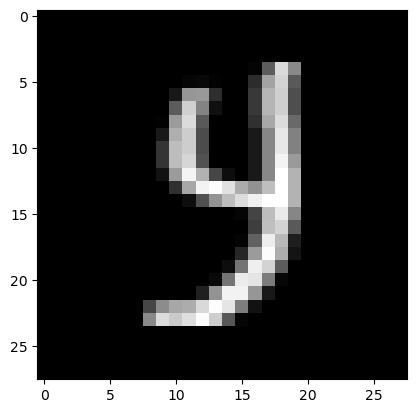

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0
A


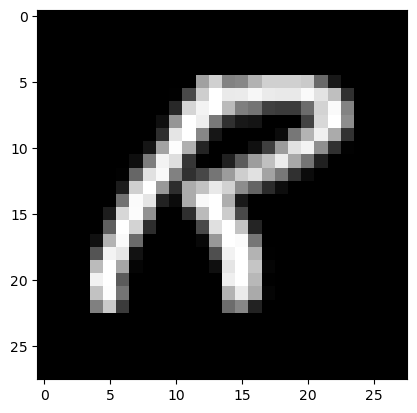

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
0
A


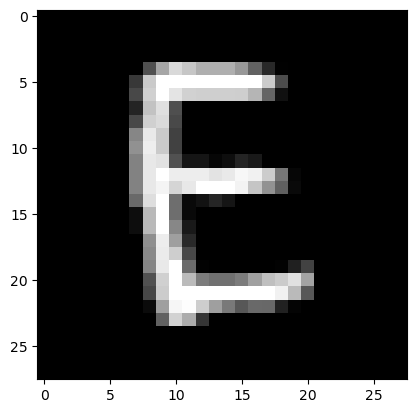

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
0
A


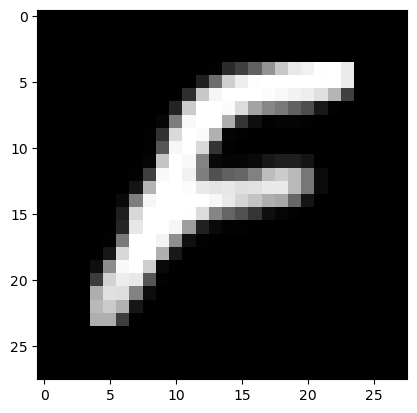

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
0
A


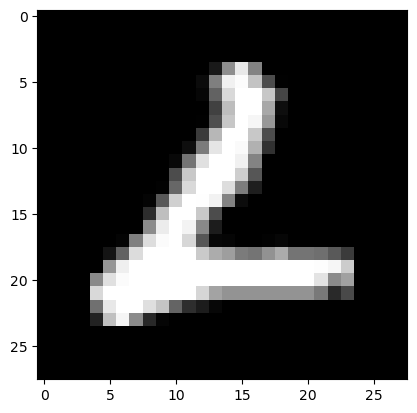

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
0
A


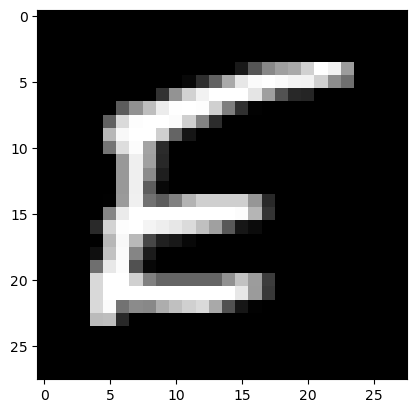

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
0
A


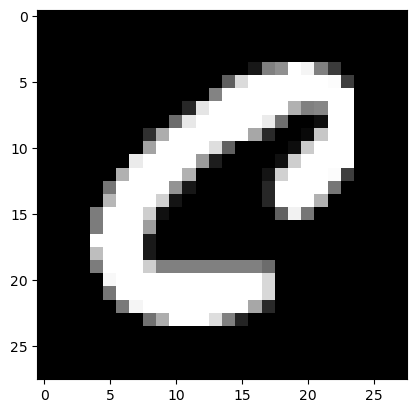

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
0
A


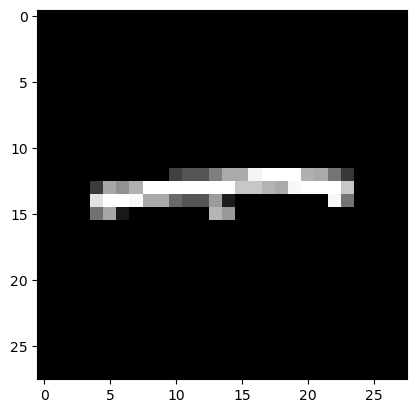

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
0
A


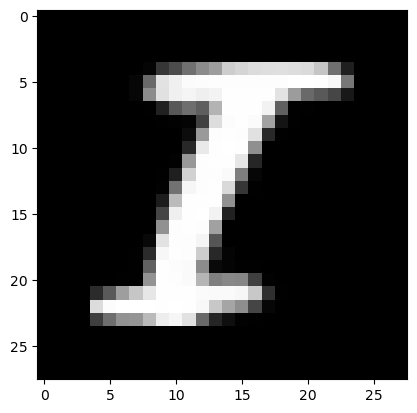

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
0
A


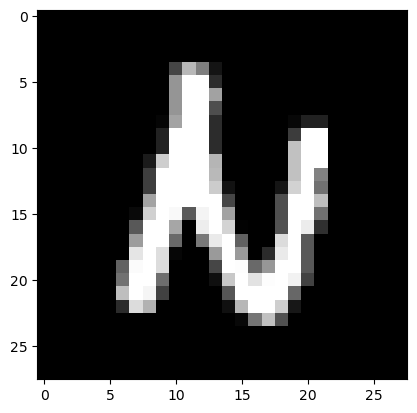

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0
A


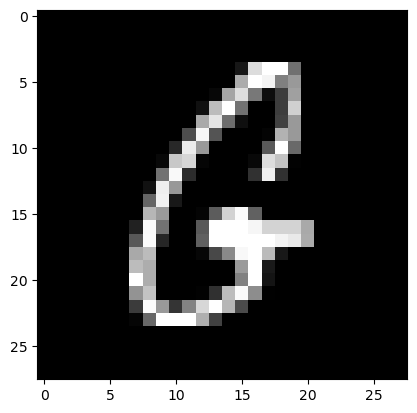

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
0
A


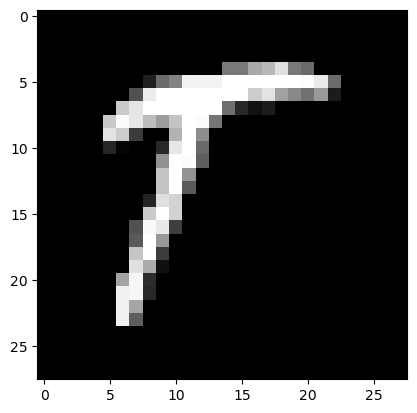

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
0
A


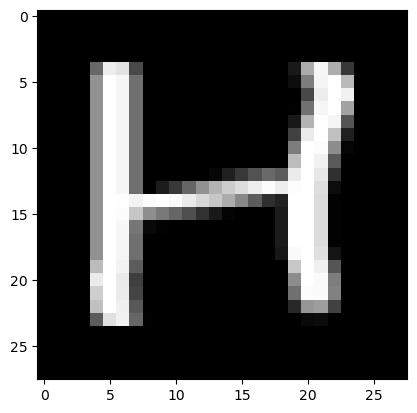

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0
A


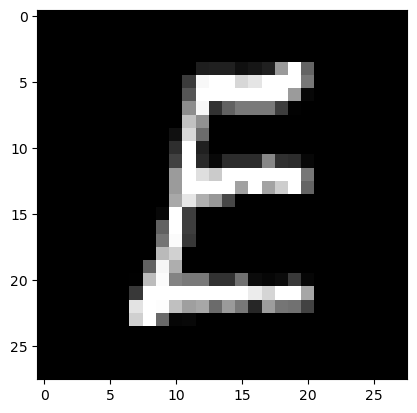

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
0
A


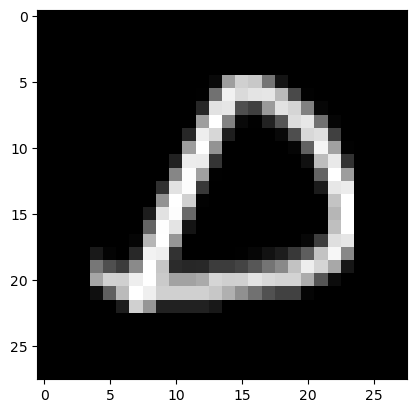

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
0
A


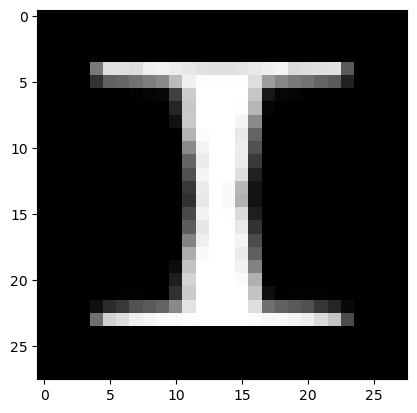

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0
A


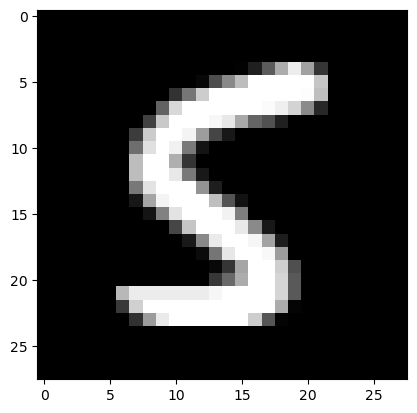

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
0
A


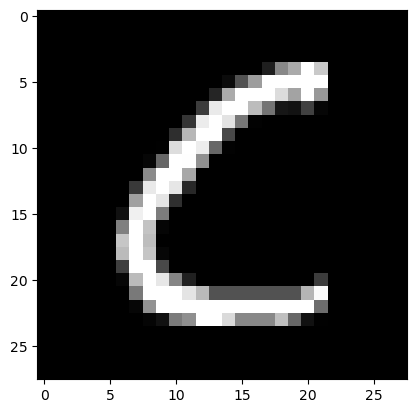

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
0
A


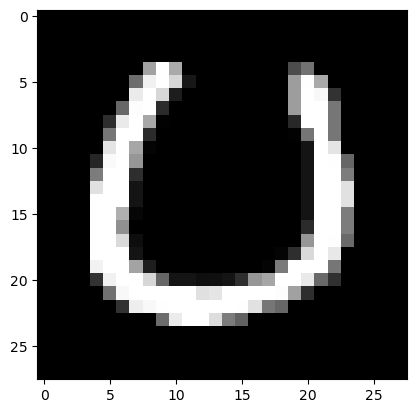

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
0
A


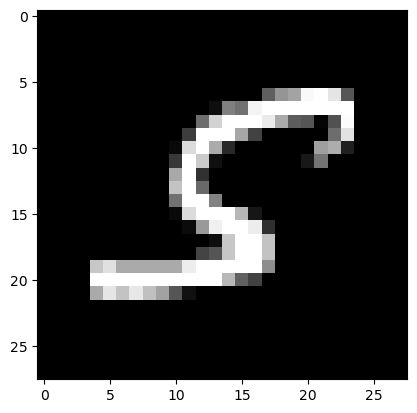

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0
A


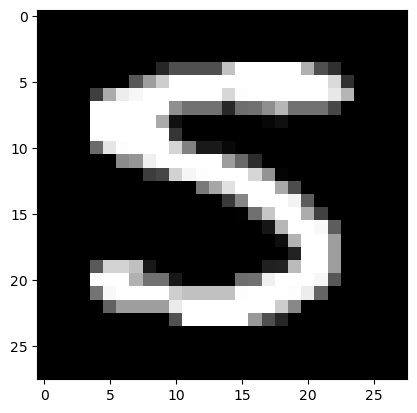

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
0
A


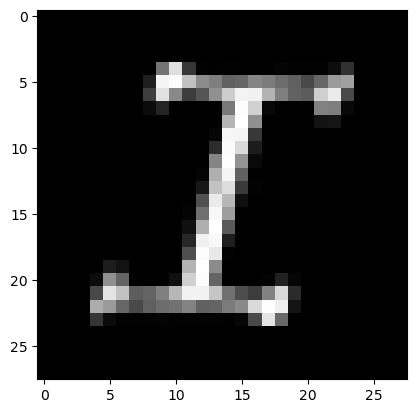

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
0
A


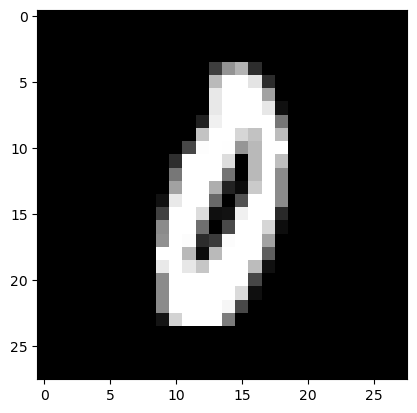

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0
A


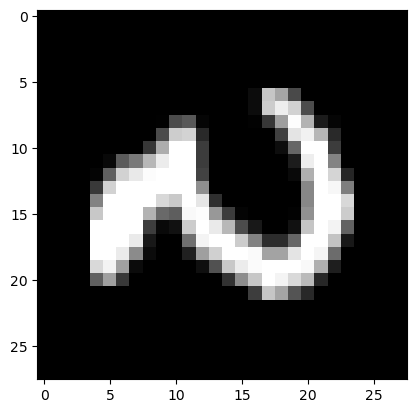

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
0
A


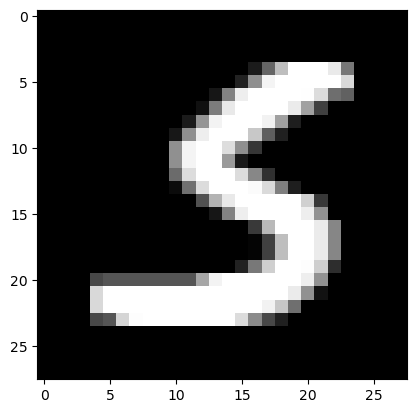

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
0
A


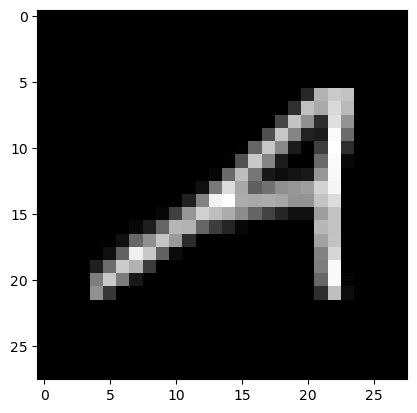

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0
A


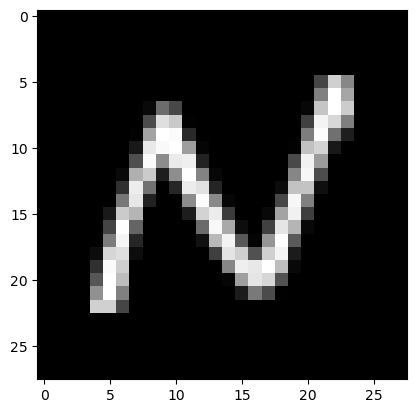

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
0
A


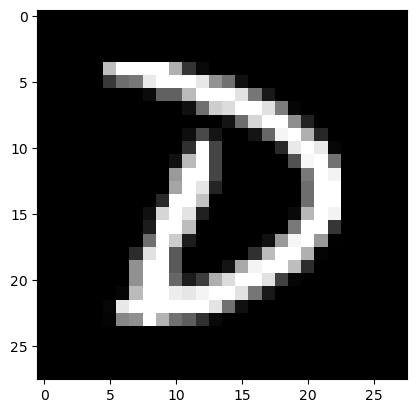

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0
A


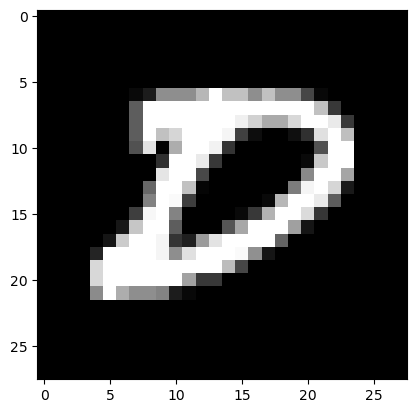

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
0
A


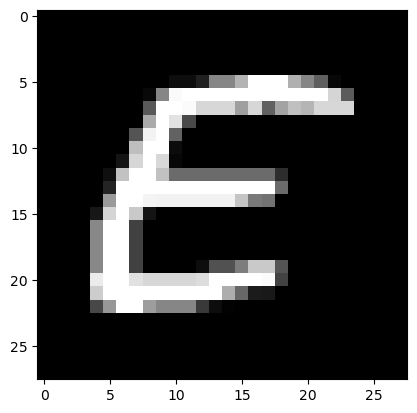

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
0
A


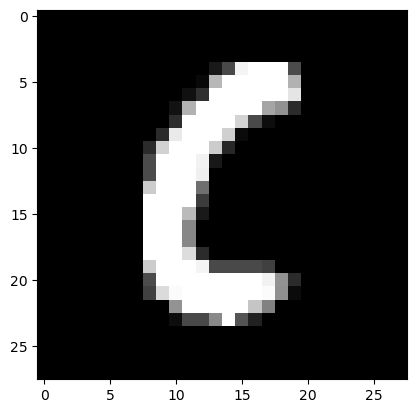

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
0
A


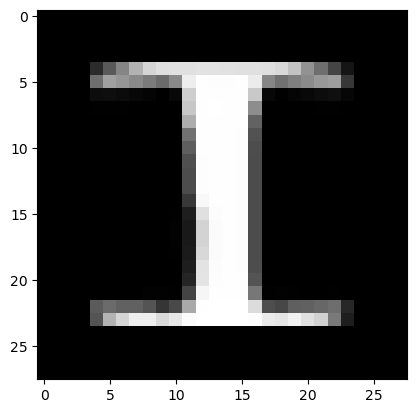

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
0
A


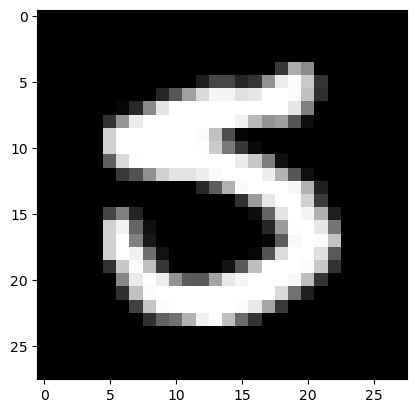

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
0
A


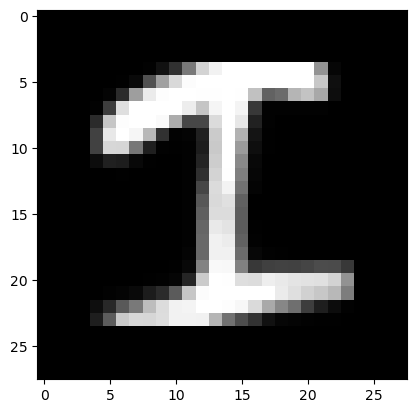

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
0
A


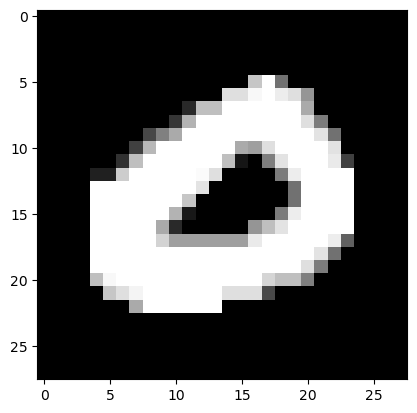

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0
A


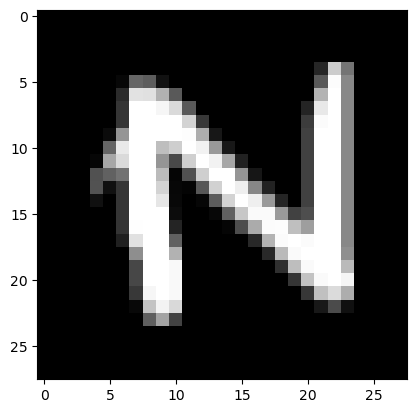

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
0
A


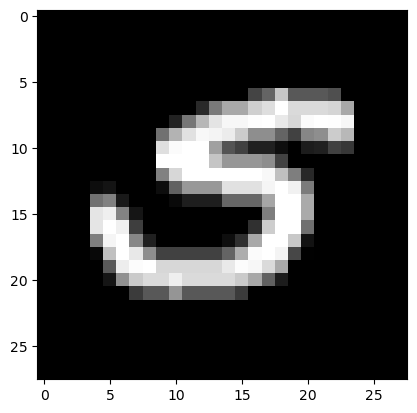

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
0
A


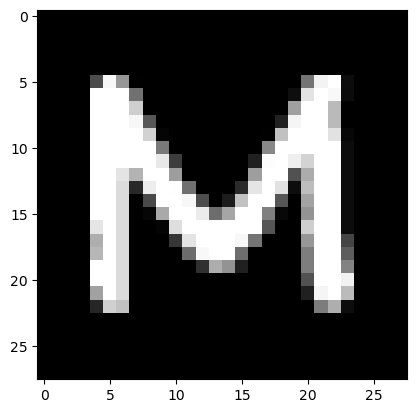

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
0
A


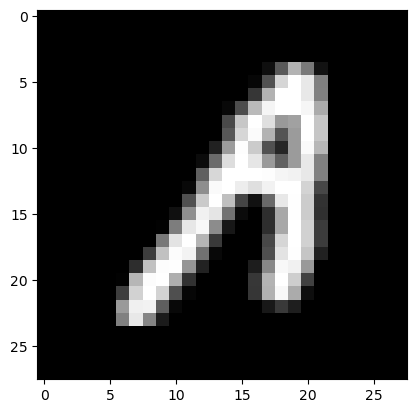

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0
A


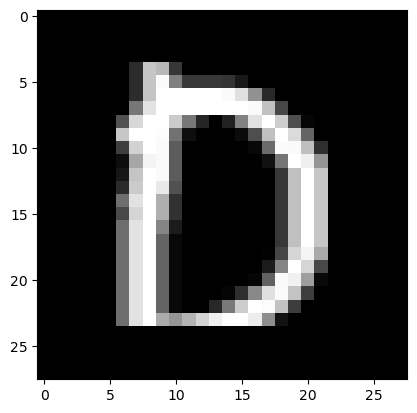

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
0
A


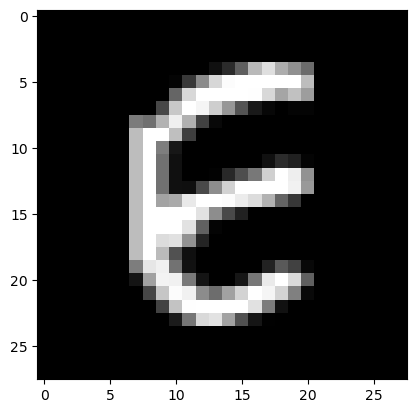

In [459]:
for char in letsss:
    #char=[char]
    prediction = model.predict(np.array(char))
    print(np.argmax(prediction))
    print(chr(np.argmax(prediction)+65))
    plt.imshow(char[0],cmap=plt.cm.binary)
    plt.show()

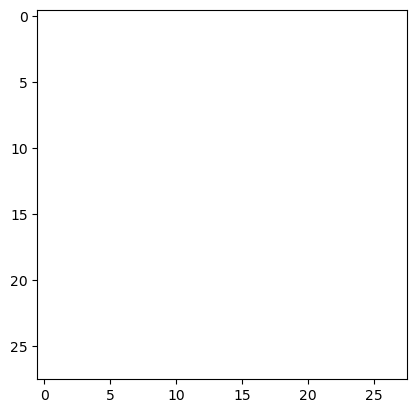

In [740]:
img=cv2.imread("target_images/line_6.png",cv2.IMREAD_GRAYSCALE)
img = np.invert(np.array([img]))
let=[]
Sum=84
for i in range(28):
    let.append([])
    let[i].extend(img[0][i][Sum:Sum+28])
let=np.array(let)
#print(let)
plt.imshow(let,cmap=plt.cm.binary)
#plt.imshow(img[0],cmap=plt.cm.binary)
plt.show()

In [198]:
#Now for the sentiment analysis training
import pandas as pd
df=pd.read_csv("sentiment_analysis_dataset.csv")
df
angry_lines=[]
angry_lines.extend(df['line'][df['sentiment']=='Angry'])
happy_lines=[]
happy_lines.extend(df['line'][df['sentiment']=='Happy'])
neutral_lines=[]
neutral_lines.extend(df['line'][df['sentiment']=='Neutral'])
print(happy_lines,neutral_lines,angry_lines,sep='\n\n')

['I AM VERY HAPPY BECAUSE YOU ALWAYS LISTEN CAREFULLY AND YOU MAKE EVERYONE FEEL VALUED WHICH CREATES A POSITIVE ENVIRONMENT', 'IT IS WONDERFUL HOW YOU ALWAYS COME PREPARED AND YOUR THOROUGHNESS MAKES A BIG DIFFERENCE IN OUR PRODUCTIVITY AND SUCCESS', 'I APPRECIATE HOW YOU ALWAYS OFFER TO HELP AND YOUR WILLINGNESS TO ASSIST OTHERS IS TRULY ADMIRABLE AND MAKES EVERYTHING EASIER', 'IT IS FANTASTIC THAT YOU ALWAYS HAVE A POSITIVE ATTITUDE AND YOUR ENTHUSIASM IS CONTAGIOUS MAKING THE WORKPLACE ENJOYABLE', 'I AM GRATEFUL FOR YOUR SUPPORT AND YOU ALWAYS ENCOURAGE EVERYONE TO DO THEIR BEST WHICH IS VERY INSPIRING AND UPLIFTING', 'IT MAKES ME HAPPY THAT YOU ALWAYS RECOGNIZE THE EFFORTS OF OTHERS AND YOUR APPRECIATION MOTIVATES EVERYONE TO KEEP WORKING HARD', 'I AM REALLY IMPRESSED BY YOUR CREATIVITY AND YOU ALWAYS BRING FRESH IDEAS TO THE TABLE WHICH IS VERY BENEFICIAL FOR OUR PROJECTS', 'IT IS AMAZING HOW YOU ALWAYS STAY CALM UNDER PRESSURE AND YOUR COMPOSURE HELPS EVERYONE STAY FOCUSED AND O

In [202]:
#A very very naive Bayes
total_words=[]
angry_words={}
happy_words={}
neutral_words={}
num_angry_words,num_happy_words,num_neutral_words=0,0,0
for el in angry_lines:
    for word in el.split():
        if word not in total_words:
            total_words.append(word)
        if word not in angry_words:
            angry_words[word]=1
        elif word in angry_words:
            angry_words[word]+=1
        num_angry_words+=1
for el in happy_lines:
    for word in el.split():
        if word not in total_words:
            total_words.append(word)
        if word not in happy_words:
            happy_words[word]=1
        elif word in happy_words:
            happy_words[word]+=1
        num_happy_words+=1
for el in neutral_lines:
    for word in el.split():
        if word not in total_words:
            total_words.append(word)
        if word not in neutral_words:
            neutral_words[word]=1
        elif word in neutral_words:
            neutral_words[word]+=1
        num_neutral_words+=1
print(len(total_words))
print(num_angry_words,angry_words)
print(num_happy_words,happy_words)
print(num_neutral_words,neutral_words)

274
230 {'I': 5, 'AM': 3, 'REALLY': 3, 'FRUSTRATED': 1, 'BECAUSE': 2, 'YOU': 16, 'CONSTANTLY': 1, 'IGNORE': 1, 'MY': 1, 'MESSAGES': 1, 'AND': 13, 'NEVER': 8, 'RESPOND': 1, 'ON': 1, 'TIME': 3, 'WHICH': 5, 'MAKES': 2, 'IT': 6, 'VERY': 4, 'HARD': 2, 'TO': 4, 'GET': 1, 'ANYTHING': 1, 'DONE': 1, 'ME': 4, 'UPSET': 1, 'THAT': 4, 'TAKE': 2, 'RESPONSIBILITY': 1, 'FOR': 5, 'YOUR': 8, 'ACTIONS': 1, 'ALWAYS': 4, 'BLAME': 1, 'OTHERS': 2, 'WHEN': 2, 'THINGS': 2, 'GO': 1, 'WRONG': 3, 'WORSENING': 1, 'THE': 4, 'SITUATION': 1, 'CANNOT': 2, 'BELIEVE': 1, 'MISSED': 1, 'ANOTHER': 1, 'DEADLINE': 1, 'LACK': 2, 'OF': 5, 'ATTENTION': 1, 'DETAIL': 1, 'IS': 9, 'CAUSING': 3, 'MAJOR': 1, 'PROBLEMS': 2, 'ENTIRE': 1, 'TEAM': 1, 'UNACCEPTABLE': 1, 'ANNOYS': 1, 'INTERRUPT': 1, 'DURING': 1, 'MEETINGS': 2, 'LET': 1, 'ANYONE': 1, 'FINISH': 1, 'THEIR': 1, 'THOUGHTS': 1, 'DISRUPTING': 1, 'WHOLE': 1, 'CONVERSATION': 1, 'TIRED': 1, 'EXCUSES': 1, 'EVERY': 1, 'SOMETHING': 1, 'GOES': 1, 'SEEM': 1, 'LEARN': 1, 'FROM': 1, 'MISTA

In [904]:
#Defining functions to account for one letter discrepency between ocr recognised word and word in dataset (only on words of length 4 or more)
def one_let_tot(word):
    if word in total_words:
        return False
    L=len(word)
    if L<4:
        return False
    compare=[]
    for w in total_words:
        if len(w)==L:
            compare.append(w)
    for w in compare:
        diff=0
        for i in range(L):
            if w[i]!=word[i]:
                diff+=1
        if diff==1 or diff == 2:
            return True
    return False

def one_let_ang(word):
    if word in total_words:
        return False,''
    L=len(word)
    if L<4:
        return False,''
    compare=[]
    for w in angry_words.keys():
        if len(w)==L:
            compare.append(w)
    for w in compare:
        diff=0
        for i in range(L):
            if w[i]!=word[i]:
                diff+=1
        if diff==1 or diff == 2:
            return True,w
    return False,''

def one_let_neu(word):
    if word in total_words:
        return False,''
    L=len(word)
    if L<4:
        return False,''
    compare=[]
    for w in neutral_words.keys():
        if len(w)==L:
            compare.append(w)
    for w in compare:
        diff=0
        for i in range(L):
            if w[i]!=word[i]:
                diff+=1
        if diff==1 or diff == 2:
            return True,w
    return False,''

def one_let_hap(word):
    if word in total_words:
        return False,''
    L=len(word)
    if L<4:
        return False,''
    compare=[]
    for w in happy_words.keys():
        if len(w)==L:
            compare.append(w)
    for w in compare:
        diff=0
        for i in range(L):
            if w[i]!=word[i]:
                diff+=1
        if diff==1 or diff == 2:
            return True,w
    return False,''

In [876]:
one_let_tot("")
one_let_ang('FRUSSRATDD')

(True, 'FRUSTRATED')

In [946]:
#Function to give probabilities of the emotion instead of just the most probable emotion
def predict_emo(line):
    line=line.split()
    prob_a,prob_h,prob_n=1/3,1/3,1/3
    for word in line:
        if word not in total_words:
            continue
        else:
            if word in angry_words:
                #print('A',(angry_words[word]+1)/(num_angry_words+len(total_words)))
                prob_a*=(angry_words[word]+1)/(num_angry_words+len(total_words))
            if word not in angry_words:
                #print('A',1/(num_angry_words+len(total_words)))
                prob_a*=1/(num_angry_words+len(total_words))
            if word in happy_words:
                #print('H',(happy_words[word]+1)/(num_happy_words+len(total_words)))
                prob_h*=(happy_words[word]+1)/(num_happy_words+len(total_words))
            if word not in happy_words:
                #print('H',1/(num_happy_words+len(total_words)))
                prob_h*=1/(num_happy_words+len(total_words))
            if word in neutral_words:
                prob_n*=(neutral_words[word]+1)/(num_neutral_words+len(total_words))
            if word not in neutral_words:
                prob_n*=1/(num_neutral_words+len(total_words))
    print("Angry =",prob_a)
    print("Neutral =",prob_n)
    print("Happy =",prob_h)

In [948]:
def updated_predict_emo(line): 
    #This model however is not yielding better results due to the oddities of Naive Bayes method and is giving wildly inconsistent results
    line=line.split()
    prob_a,prob_h,prob_n=1/3,1/3,1/3
    for word in line:
        if (word not in total_words) and not(one_let_tot(word)):
            continue
        else:
            if word in angry_words:
                prob_a*=(angry_words[word]+1)/(num_angry_words+len(total_words))
            if one_let_ang(word)[0]==True:
                prob_a*=(angry_words[one_let_ang(word)[1]]+1)/(num_angry_words+len(total_words))
            if word not in angry_words:
                prob_a*=1/(num_angry_words+len(total_words))
            if word in happy_words:
                #print((happy_words[word]+1)/(num_happy_words+len(total_words)))
                prob_h*=(happy_words[word]+1)/(num_happy_words+len(total_words))
            if one_let_hap(word)[0]==True:
                #print((happy_words[one_let_hap(word)[1]]+1)/(num_happy_words+len(total_words)))
                prob_h*=(happy_words[one_let_hap(word)[1]]+1)/(num_happy_words+len(total_words))
            if word not in happy_words:
                #print(1/(num_happy_words+len(total_words)))
                prob_h*=1/(num_happy_words+len(total_words))
            if word in neutral_words:
                prob_n*=(neutral_words[word]+1)/(num_neutral_words+len(total_words))
            if one_let_neu(word)[0]==True:
                prob_n*=(neutral_words[one_let_neu(word)[1]]+1)/(num_neutral_words+len(total_words))
            if word not in neutral_words:
                prob_n*=1/(num_neutral_words+len(total_words))
    print("Angry =",prob_a)
    print("Neutral =",prob_n)
    print("Happy =",prob_h)

In [936]:
def Updated_predict_emo(line): #Running separately to prevent repititons using continue, this is yielding the best results from my tests
    line=line.split()
    prob_a,prob_h,prob_n=1/3,1/3,1/3
    for word in line:
        if (word not in total_words) and not(one_let_tot(word)):
            continue
        else:
            if word in angry_words:
                prob_a*=(angry_words[word]+1)/(num_angry_words+len(total_words))
                continue
            elif one_let_ang(word)[0]==True:
                prob_a*=(angry_words[one_let_ang(word)[1]]+1)/(num_angry_words+len(total_words))
                continue
            elif word not in angry_words:
                prob_a*=1/(num_angry_words+len(total_words))
                continue
    for word in line:
        if (word not in total_words) and not(one_let_tot(word)):
            continue
        else:
            if word in happy_words:
                prob_h*=(happy_words[word]+1)/(num_happy_words+len(total_words))
                continue
            elif one_let_hap(word)[0]==True:
                prob_h*=(happy_words[one_let_hap(word)[1]]+1)/(num_happy_words+len(total_words))
                continue
            elif word not in happy_words:
                prob_h*=1/(num_happy_words+len(total_words))
                continue
    for word in line:
        if (word not in total_words) and not(one_let_tot(word)):
            continue
        else:
            if word in neutral_words:
                prob_n*=(neutral_words[word]+1)/(num_neutral_words+len(total_words))
                continue
            elif one_let_neu(word)[0]==True:
                prob_n*=(neutral_words[one_let_neu(word)[1]]+1)/(num_neutral_words+len(total_words))
                continue
            elif word not in neutral_words:
                prob_n*=1/(num_neutral_words+len(total_words))
                continue
    print("Angry =",prob_a)
    print("Neutral =",prob_n)
    print("Happy =",prob_h)

In [960]:
OP

'YOUR ANALYSIS OF THE DATA WAS ACCURATE AND WELL YRESENTED PROUIDJNG D CLEAR UNOERSTANMING OF THE TRENDS ANO PATTERNS    '

In [898]:
print(angry_words.keys())
print(happy_words.keys())
print(neutral_words.keys())

dict_keys(['I', 'AM', 'REALLY', 'FRUSTRATED', 'BECAUSE', 'YOU', 'CONSTANTLY', 'IGNORE', 'MY', 'MESSAGES', 'AND', 'NEVER', 'RESPOND', 'ON', 'TIME', 'WHICH', 'MAKES', 'IT', 'VERY', 'HARD', 'TO', 'GET', 'ANYTHING', 'DONE', 'ME', 'UPSET', 'THAT', 'TAKE', 'RESPONSIBILITY', 'FOR', 'YOUR', 'ACTIONS', 'ALWAYS', 'BLAME', 'OTHERS', 'WHEN', 'THINGS', 'GO', 'WRONG', 'WORSENING', 'THE', 'SITUATION', 'CANNOT', 'BELIEVE', 'MISSED', 'ANOTHER', 'DEADLINE', 'LACK', 'OF', 'ATTENTION', 'DETAIL', 'IS', 'CAUSING', 'MAJOR', 'PROBLEMS', 'ENTIRE', 'TEAM', 'UNACCEPTABLE', 'ANNOYS', 'INTERRUPT', 'DURING', 'MEETINGS', 'LET', 'ANYONE', 'FINISH', 'THEIR', 'THOUGHTS', 'DISRUPTING', 'WHOLE', 'CONVERSATION', 'TIRED', 'EXCUSES', 'EVERY', 'SOMETHING', 'GOES', 'SEEM', 'LEARN', 'FROM', 'MISTAKES', 'DISAPPOINTING', 'UPSETS', 'ARRIVE', 'LATE', 'RESPECT', 'OTHER', 'PEOPLES', 'DELAYS', 'FRUSTRATION', 'EVERYONE', 'INVOLVED', 'ANGRY', 'PREPARE', 'EFFORT', 'EVIDENT', 'UNPROFESSIONAL', 'INFURIATES', 'APPRECIATE', 'WORK', 'CREDIT'

In [1055]:
predict_emo(OP)

Angry = 1.6941057948863139e-12
Neutral = 2.082973729440604e-11
Happy = 1.2537208092670214e-12


In [972]:
updated_predict_emo("YOUR ANALYSIS OF THE DATA WAS ACCURATE AND WELL PRESENTED PROVIDING A CLEAR UNDERSTANDING OF THE TRENDS AND PATTERNS")    

Angry = 3.102075163607639e-32
Neutral = 3.676876062281014e-28
Happy = 1.4191012244572245e-32


In [1057]:
updated_predict_emo(OP)

Angry = 3.076224537244243e-30
Neutral = 1.3370458408294598e-31
Happy = 4.888769768465078e-35


In [1059]:
Updated_predict_emo(OP)

Angry = 7.814102520526336e-25
Neutral = 1.2677710356517382e-23
Happy = 2.4887084570161624e-24
